 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [8]:
# Reading whale returns
whale_port_csv = Path("../Assignment/whale_returns.csv")
whale_port_data = pd.read_csv(whale_port_csv, index_col ="Date", parse_dates=True, infer_datetime_format=True)

whale_port_data.sort_index(ascending=True, inplace=True)
whale_port_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [10]:
# Count nulls
whale_port_data.isnull()
whale_port_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [11]:
# Drop nulls
whale_port_data.dropna(inplace=True)
whale_port_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [12]:
# Reading algorithmic returns
algo_port_csv = Path("../Assignment/algo_returns.csv")
algo_port_data = pd.read_csv(algo_port_csv, index_col ="Date", parse_dates=True, infer_datetime_format=True)

algo_port_data.sort_index(ascending=True, inplace=True)
algo_port_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [15]:
# Count nulls
algo_port_data.isnull()
algo_port_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [16]:
# Drop nulls
algo_port_data.dropna(inplace=True)
algo_port_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [64]:
# Reading S&P 500 Closing Prices
sp500_port_csv = Path("../Assignment/sp500_history.csv")
sp500_port_data = pd.read_csv(sp500_port_csv, index_col ="Date", parse_dates=True, infer_datetime_format=True)

sp500_port_data.sort_index(ascending=True, inplace=True)
sp500_port_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [65]:
# Check Data Types
sp500_port_data.dtypes


Close    object
dtype: object

In [66]:
# Fix Data Types
# Remove dollar sign without using string. Souce: https://newbedev.com/remove-dollar-sign-from-entire-python-pandas-dataframe
sp500_port_data['Close'] = sp500_port_data['Close'].replace({'\$':''}, regex=True)

#Turn data to float 
sp500_port_data = sp500_port_data.astype('float')
sp500_port_data.dtypes

Close    float64
dtype: object

In [67]:
# Calculate Daily Returns
sp500_daily_returns = sp500_port_data.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [68]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [69]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns = {
    "Close": "sp500_Daily_Returns"
})
sp500_daily_returns.head()

,sp500_Daily_Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [70]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_port = pd.concat([whale_port_data, algo_port_data, sp500_daily_returns], axis='columns', join='inner')
combined_port.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

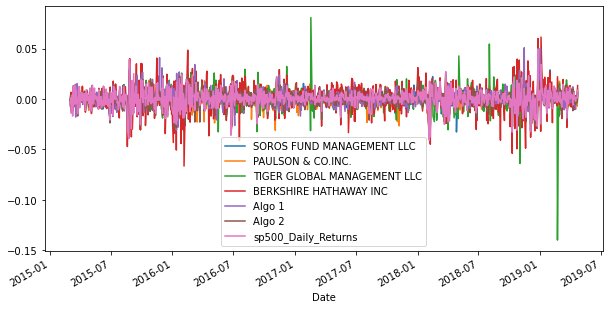

In [71]:
# Plot daily returns of all portfolios
combined_port.plot(figsize = (10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

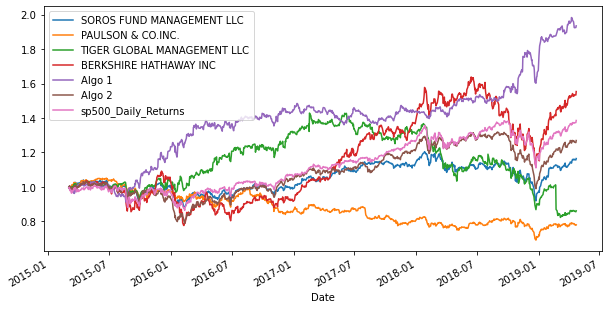

In [72]:
# Calculate cumulative returns of all portfolios
combined_port_cummr = (1 + combined_port).cumprod()

# Plot cumulative returns
combined_port_cummr.plot(figsize =(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

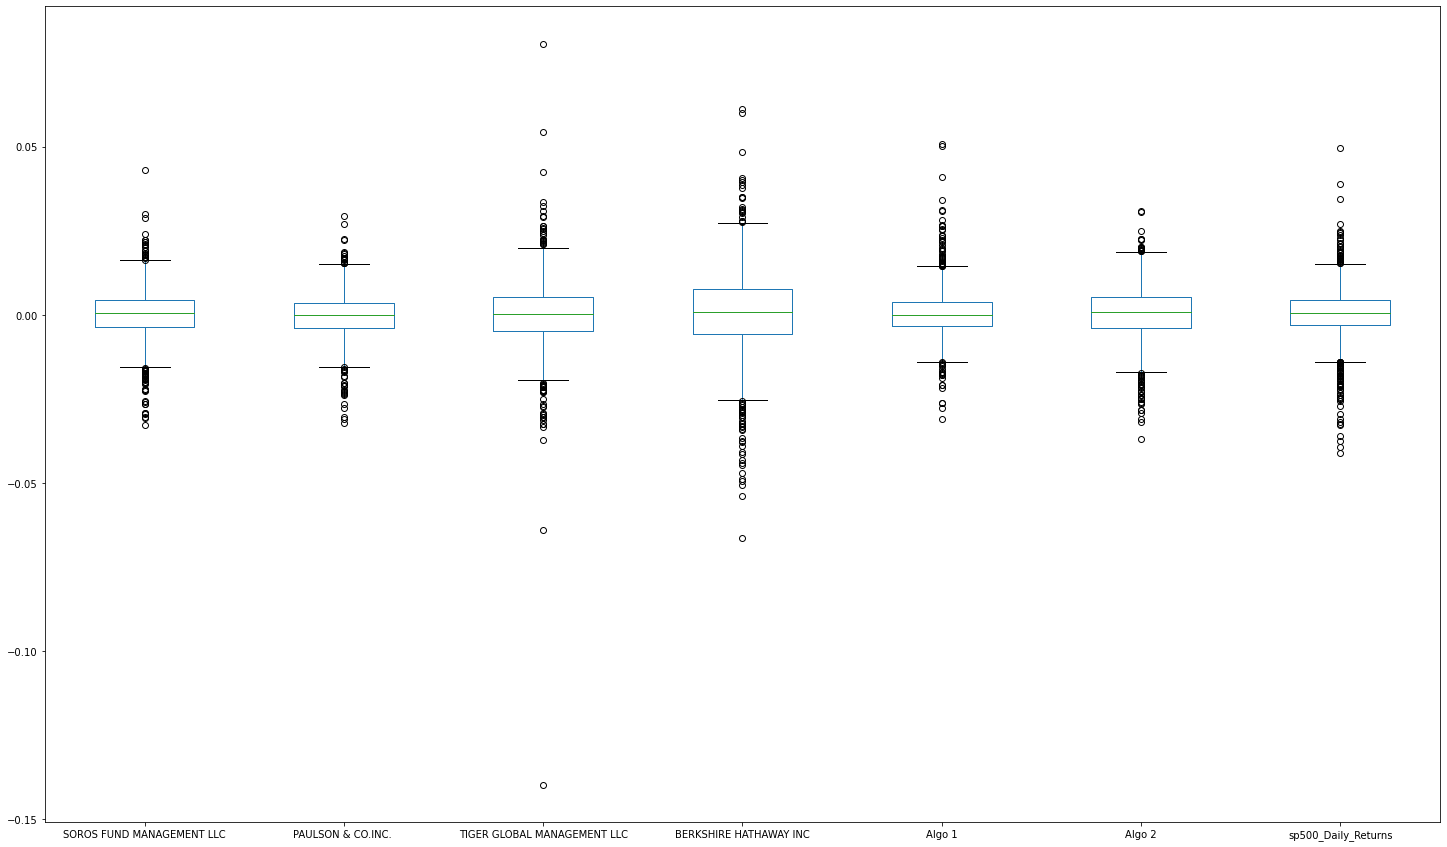

In [73]:
# Box plot to visually show risk
combined_port.plot(kind= "box", figsize = (25,15))

### Calculate Standard Deviations

In [74]:
# Calculate the daily standard deviations of all portfolios
combined_port_stdev = combined_port.std()
combined_port_stdev

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500_Daily_Returns            0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [78]:
# Calculate  the daily standard deviation of S&P 500
# Already included in the above table

# Determine which portfolios are riskier than the S&P 500
print("Berkshire and Tiger are risker than S&P 500 because they have higher volatility")

Berkshire and Tiger are risker than S&P 500 because they have higher volatility


### Calculate the Annualized Standard Deviation

In [79]:
# Calculate the annualized standard deviation (252 trading days)
combined_port_stdev_annualised = combined_port_stdev * np.sqrt(252)
combined_port_stdev_annualised

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500_Daily_Returns            0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

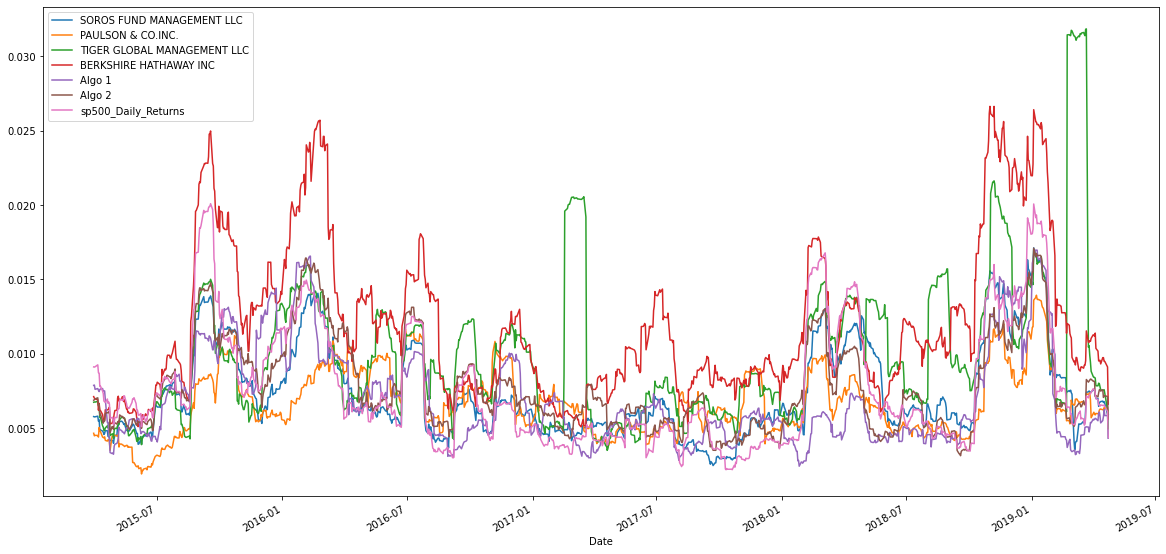

In [82]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_port_rolling = combined_port.rolling(window=21).std()

# Plot the rolling standard deviation
combined_port_rolling.plot(figsize =(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

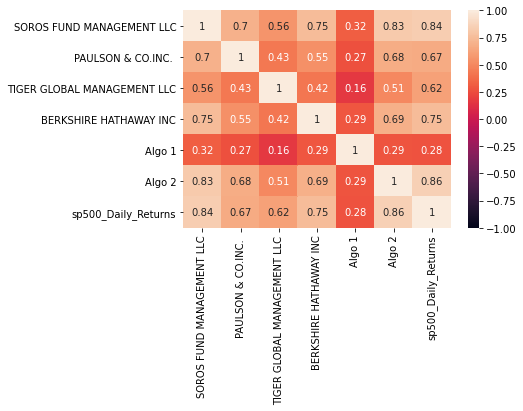

In [88]:
# Calculate the correlation
combined_port_correlation = combined_port.corr()

# Display de correlation matrix
import seaborn as sns
sns.heatmap(combined_port_correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta trend for Algo 1 Porfolio'}, xlabel='Date'>

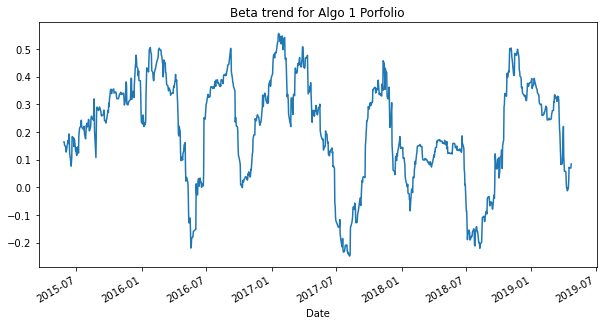

In [99]:
# Calculate covariance of a single portfolio
covariance_Algo1_roll = combined_port["Algo 1"].rolling(window=60).cov(combined_port["sp500_Daily_Returns"])

# Calculate variance of S&P 500
variance_sp500_roll = combined_port["sp500_Daily_Returns"].rolling(window=60).var()

# Computing beta
beta_Algo1_roll = covariance_Algo1_roll / variance_sp500_roll
beta_Algo1_roll


# Plot beta trend
beta_Algo1_roll.plot(figsize=(10,5), title="Beta trend for Algo 1 Porfolio")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [102]:
# Annualized Sharpe Ratios
combined_port_sharpe_ratio = (combined_port.mean()*252) / (combined_port.std() * np.sqrt(252))
combined_port_sharpe_ratio 

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500_Daily_Returns            0.648267
dtype: float64

<AxesSubplot:title={'center':'All Port Sharpe Ratios'}>

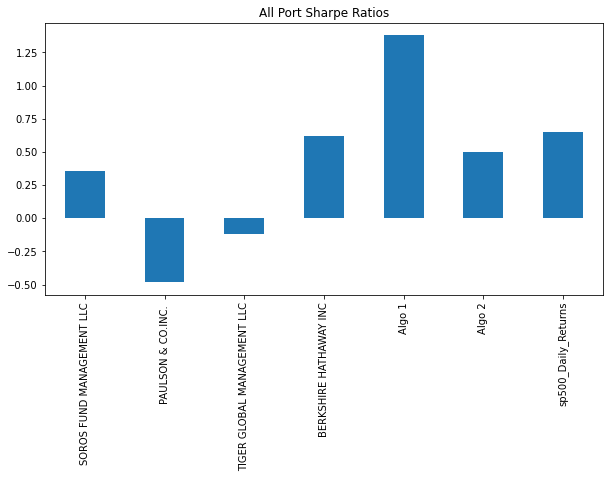

In [104]:
# Visualize the sharpe ratios as a bar plot
combined_port_sharpe_ratio.plot(kind='bar', title='All Port Sharpe Ratios', figsize=(10,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 strategy outperform both S&P500 and whales portfolio 
Algo 2 strategy outperform most whales portfolios except Berkshire Hathaway and S&P500

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

In [113]:
# Reading data from 1st stock
#whale_port_csv = Path("../Assignment/whale_returns.csv")
#whale_port_data = pd.read_csv(whale_port_csv, index_col ="Date", parse_dates=True, infer_datetime_format=True)

#whale_port_data.sort_index(ascending=True, inplace=True)
#whale_port_data.head()

AAPL_csv = Path("Custom Port/AAPL.csv")
AAPL_data = pd.read_csv(
    AAPL_csv,
    index_col ="Date",
    parse_dates=True,
    infer_datetime_format=True
)
AAPL_data.sort_index(ascending=True, inplace=True)

AAPL_data = AAPL_data.rename(columns = {"Close": "AAPL"})

AAPL_data.head()

,AAPL
Date,
2019-09-03 16:00:00,51.43
2019-09-04 16:00:00,52.30
2019-09-05 16:00:00,53.32
2019-09-06 16:00:00,53.32
2019-09-09 16:00:00,53.54


In [114]:
# Reading data from 2nd stock
MSTR_csv = Path("Custom Port/MSTR.csv")
MSTR_data = pd.read_csv(
    MSTR_csv,
    index_col ="Date",
    parse_dates=True,
    infer_datetime_format=True
)
MSTR_data.sort_index(ascending=True, inplace=True)

MSTR_data = MSTR_data.rename(columns = {"Close": "MSTR"})

MSTR_data.head()

,MSTR
Date,
2019-09-03 16:00:00,143.60
2019-09-04 16:00:00,137.17
2019-09-05 16:00:00,141.41
2019-09-06 16:00:00,139.89
2019-09-09 16:00:00,143.69


In [115]:
# Reading data from 3rd stock
NVDA_csv = Path("Custom Port/NVDA.csv")
NVDA_data = pd.read_csv(
    NVDA_csv,
    index_col ="Date",
    parse_dates=True,
    infer_datetime_format=True
)
NVDA_data.sort_index(ascending=True, inplace=True)

NVDA_data = NVDA_data.rename(columns = {"Close": "NVDA"})

NVDA_data.head()

,NVDA
Date,
2019-09-03 16:00:00,41.04
2019-09-04 16:00:00,42.19
2019-09-05 16:00:00,44.94
2019-09-06 16:00:00,44.66
2019-09-09 16:00:00,45.13


In [119]:
# Combine all stocks in a single DataFrame
combined_custom_port = pd.concat([AAPL_data, MSTR_data, NVDA_data], axis="columns", join="inner")
combined_custom_port

,AAPL,MSTR,NVDA
Date,,,
2019-09-03 16:00:00,51.43,143.60,41.04
2019-09-04 16:00:00,52.30,137.17,42.19
2019-09-05 16:00:00,53.32,141.41,44.94
2019-09-06 16:00:00,53.32,139.89,44.66
2019-09-09 16:00:00,53.54,143.69,45.13
...,...,...,...
2021-07-26 16:00:00,148.99,682.50,192.94
2021-07-27 16:00:00,146.77,630.61,192.08
2021-07-28 16:00:00,144.98,646.65,195.03


In [120]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol
# Done this by adding a column name when reading data above

In [125]:
# Calculate daily returns
combined_custom_port_return = combined_custom_port.pct_change()

# Drop NAs
combined_custom_port_return.dropna(inplace=True)

# Display sample data
combined_custom_port_return.head()

,AAPL,MSTR,NVDA
Date,,,
2019-09-04 16:00:00,0.016916,-0.044777,0.028021
2019-09-05 16:00:00,0.019503,0.030911,0.065181
2019-09-06 16:00:00,0.000000,-0.010749,-0.006231
2019-09-09 16:00:00,0.004126,0.027164,0.010524
2019-09-10 16:00:00,0.011954,0.008838,0.014846


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [135]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_weighted_return = combined_custom_port_return.dot(weights)

# Display sample data
custom_weighted_return.head()



Date
2019-09-04 16:00:00    0.000053
2019-09-05 16:00:00    0.038532
2019-09-06 16:00:00   -0.005660
2019-09-09 16:00:00    0.013938
2019-09-10 16:00:00    0.011879
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [132]:
# Join your returns DataFrame to the original returns DataFrame
# Doesn't make sense to concat because the date range is different



In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [137]:
# Calculate the annualized `std`
custom_weighted_stdev = custom_weighted_return.std() * np.sqrt(252)
custom_weighted_stdev

0.4283794852482938

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

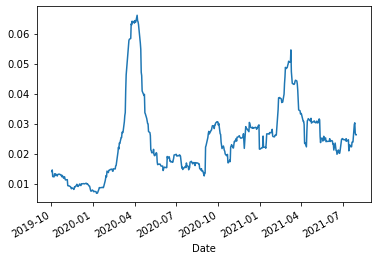

In [139]:
# Calculate rolling standard deviation
custom_weighted_stdev_roll = custom_weighted_return.rolling(window=21).std()


# Plot rolling standard deviation
custom_weighted_stdev_roll.plot()

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!